# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 20th, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

In this laboratory we will treat the following main topics:

1) Template matching
    - Normalized Cross-correlation
    - Application to object (eye) detection 

2) Image Descriptors: "Sliding window" and HOG image descriptor
   - Application to object (car) detection

3) Image matching (recognition by correspondance) based on feature extraction (ORB)
    - Application to object (logo) detection
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

All code should be commented in English. Answers of the questions and comments on the exercises should be given in English too.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

1.1 Given the image 'einstein.png' and the template 'eye.png', detect the location of the template in the image comparing the use of:
- euclidean distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Hint: you can take as an example, the template matching on the [coin exercise](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html#sphx-glr-auto-examples-features-detection-plot-template-py) in skimage.
Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

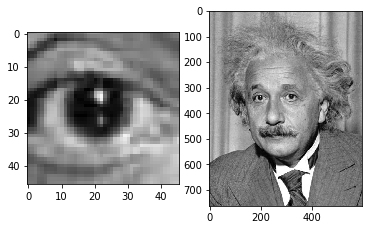

In [3]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(1,2,1)
eye=io.imread('./images/eye.png')
plt.imshow(eye)

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)

plt.show()


Create a function for applying euclidean distance and normalized cross-correlation and display the results in this format:
    
<img src="images_notebook/template_matching.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

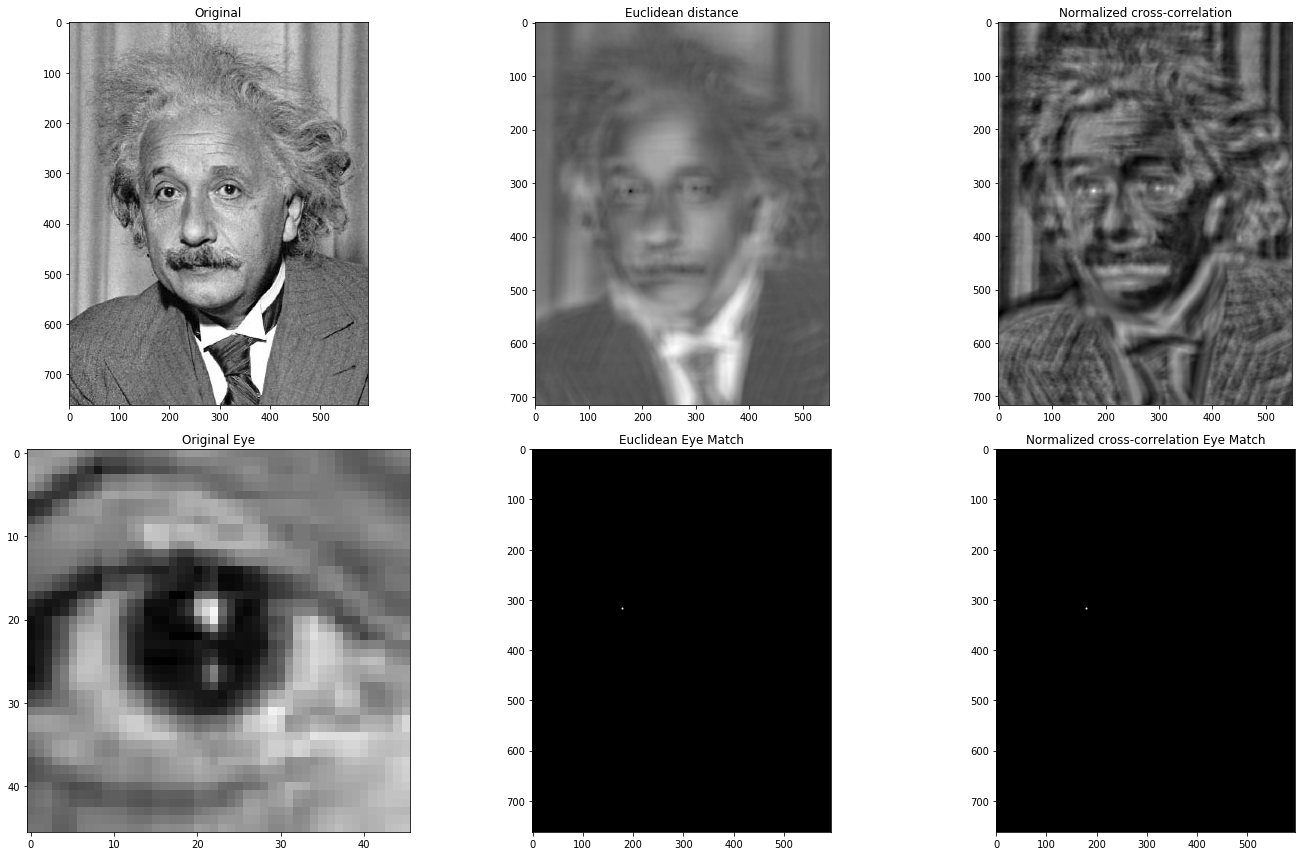

In [4]:
from skimage.feature import match_template
from skimage.color import rgb2gray

def template_location(patch, im): #slinding window
    im_gray = rgb2gray(im)
    patch_gray = rgb2gray(patch)

    fila, colum = im_gray.shape
    p_h, p_v = patch_gray.shape

    im2 = np.zeros(shape=(fila-p_h,colum-p_v))
    for i in range(0, fila-p_h):
        for j in range(0,colum-p_v):
            im2[i][j] = np.linalg.norm(im_gray[ i:i+p_h, j:j+p_v] - patch_gray)
    return im2

def temp_matching(image, img_eye):
    
    img_gray= rgb2gray(image)
    eye_gray = rgb2gray(img_eye)

    euclidean_result = template_location(img_eye, image)
    correlation_result = match_template(img_gray, eye_gray)

    euclidean_indices = np.unravel_index(np.argmin(euclidean_result), euclidean_result.shape)
    correlation_indices = np.unravel_index(np.argmax(correlation_result), correlation_result.shape)
    
    img_match = np.zeros((img_gray.shape[0], img_gray.shape[1]))
    
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3,nrows=2,figsize=(20,12))

    ax1.imshow(image,cmap='gray')
    ax1.set_title('Original')

    ax2.imshow(euclidean_result,cmap='gray')
    ax2.set_title('Euclidean distance')

    ax3.imshow(correlation_result,cmap='gray')
    ax3.set_title('Normalized cross-correlation')
    
    ax4.imshow(img_eye,cmap='gray')
    ax4.set_title('Original Eye')
    
    ax5.imshow(img_match,cmap='gray')
    ax5.plot(euclidean_indices[1],euclidean_indices[0],"o",markeredgecolor="w",markerfacecolor="none",markersize=1)
    ax5.set_title('Euclidean Eye Match')

    ax6.imshow(img_match,cmap='gray')
    ax6.plot(correlation_indices[1],correlation_indices[0],"o",markeredgecolor="w",markerfacecolor="none",markersize=1)
    ax6.set_title('Normalized cross-correlation Eye Match')

    plt.tight_layout()
    plt.show()
    
temp_matching(einstein, eye)

How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? To this purpose, read the images "einstein_br.png" and "einstein_mask.png".

Visualize the normalized cross-correlation image between the template and the image as well as this very same image in a binarized form in order to show where is the minimal distance between the template and the image. 

Use titles of the figures to explain what is displayed.


1.2 Display the results on `einstein_br.png`:

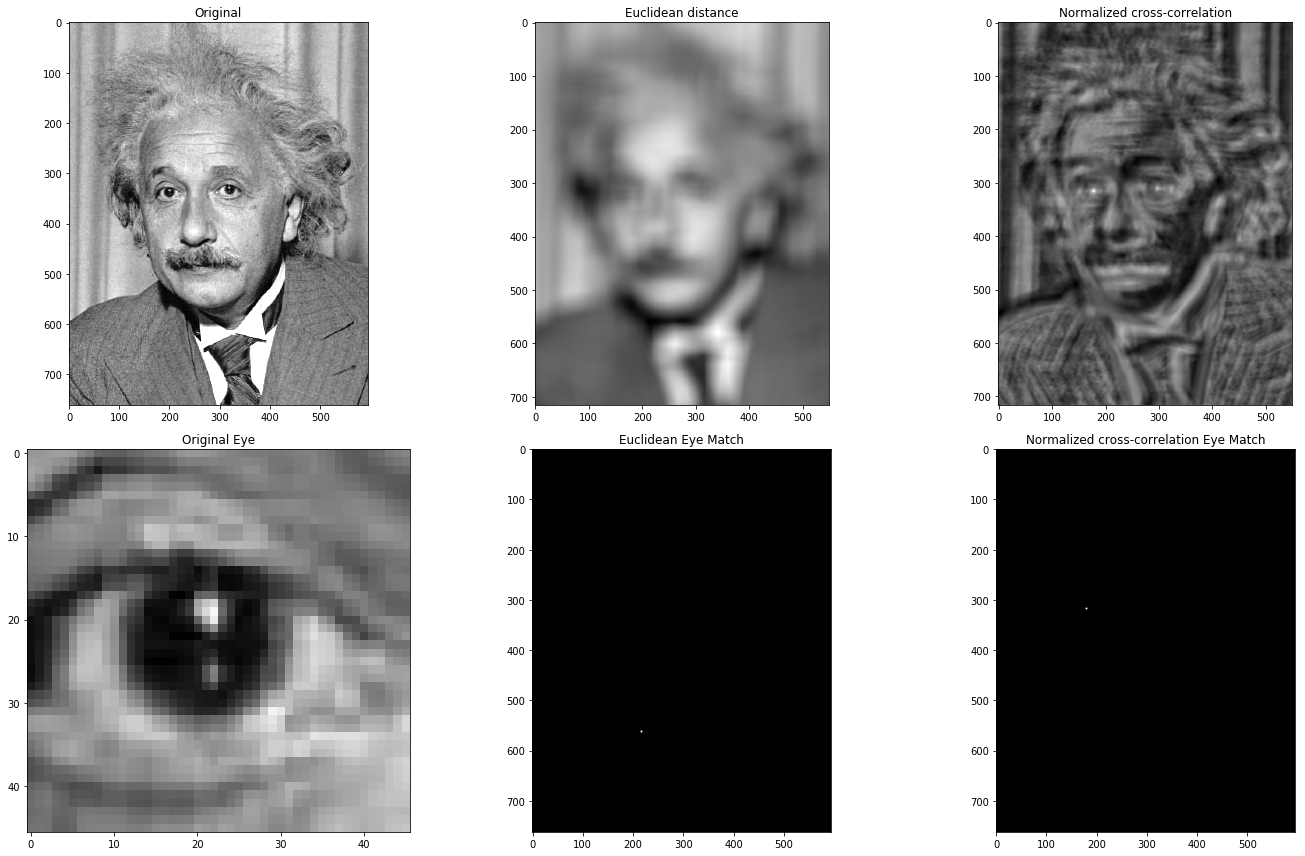

In [5]:
einstein_br = io.imread('images/einstein_br.png', cmap='gray')
temp_matching(einstein_br,eye)

1.3 Display the results on `einstein_mask.png`:

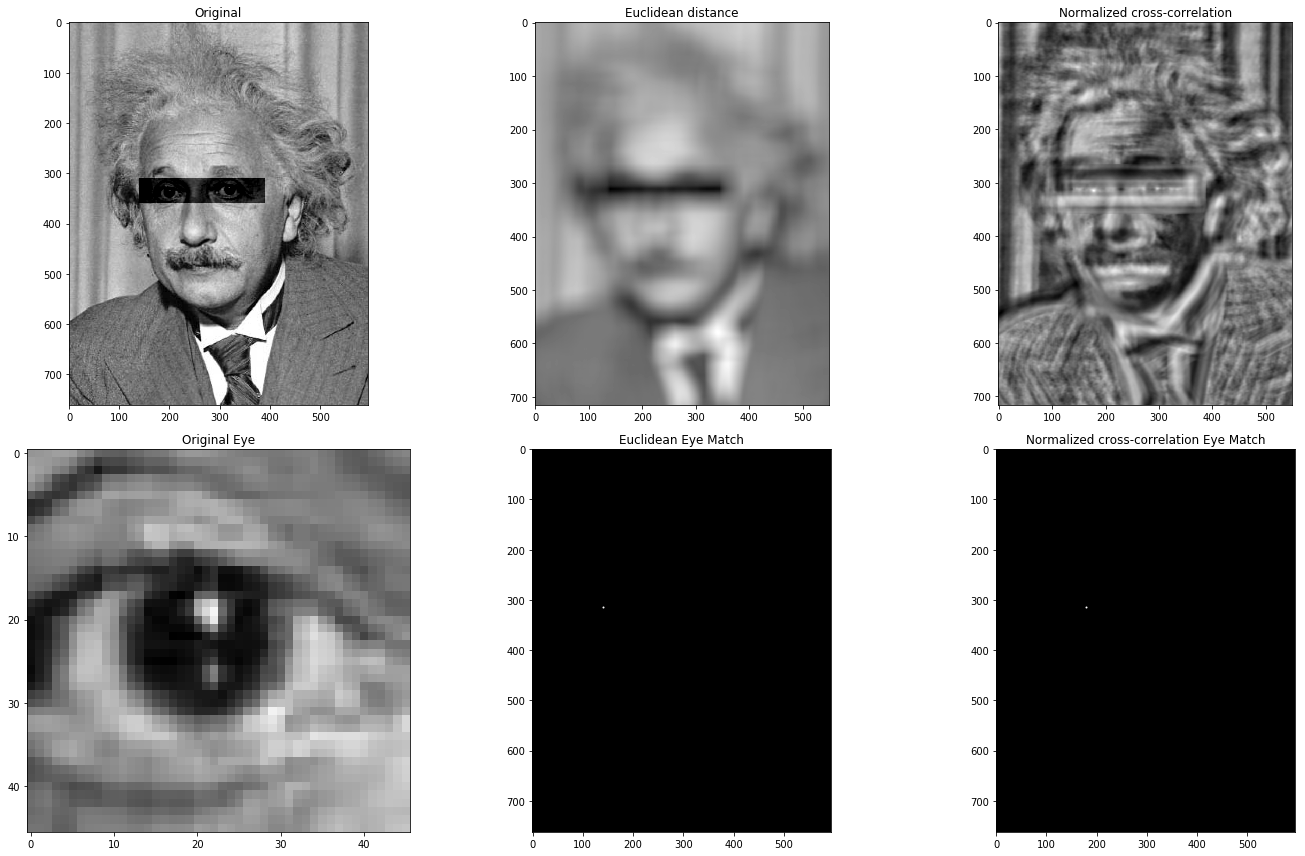

In [6]:
einstein_mask = io.imread('images/einstein_mask.png', cmap='gray')
temp_matching(einstein_mask,eye)

1.4.
* How does the minimum distance between the template and the image change? 
* What are the minimal distance pixels in the correlation images? 
* What are the distances between the template and the image around the eyes of the image? 

##### How does the minimum distance between the template and the image change? 
"""
Falta modificar estas respuestas.
"""
##### What are the minimal distance pixels in the correlation images

##### What are the distances between the template and the image around the eyes of the image?
It comes to be 1

1.5 How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the 'eye_br.png' template.

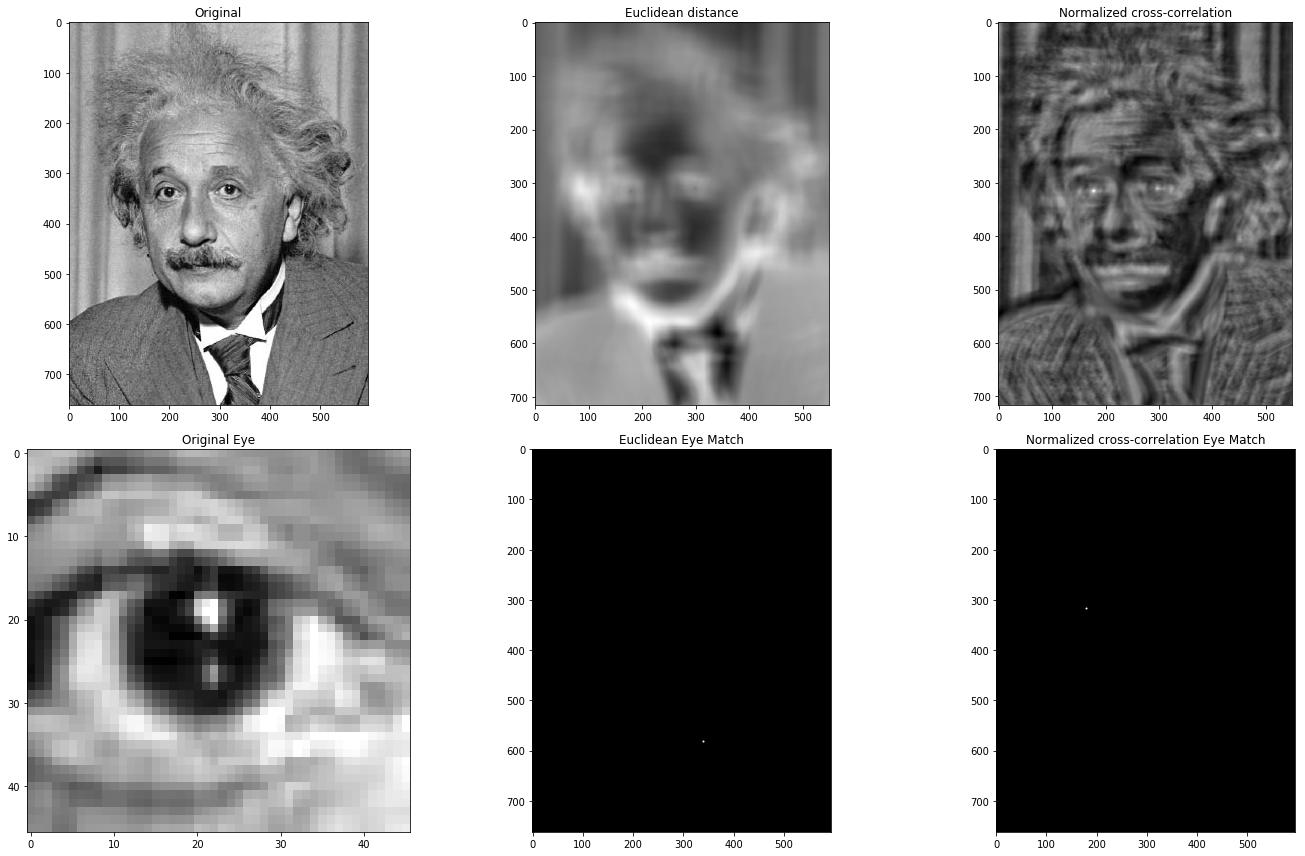

In [7]:
eye_br = io.imread("images/eye_br.png", cmap='gray')
temp_matching(einstein,eye_br)

1.6 Check how the result changes if the template is rotated. Visualize the template and its rotation by 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.
Help: use the function rotate() in skimage.transform

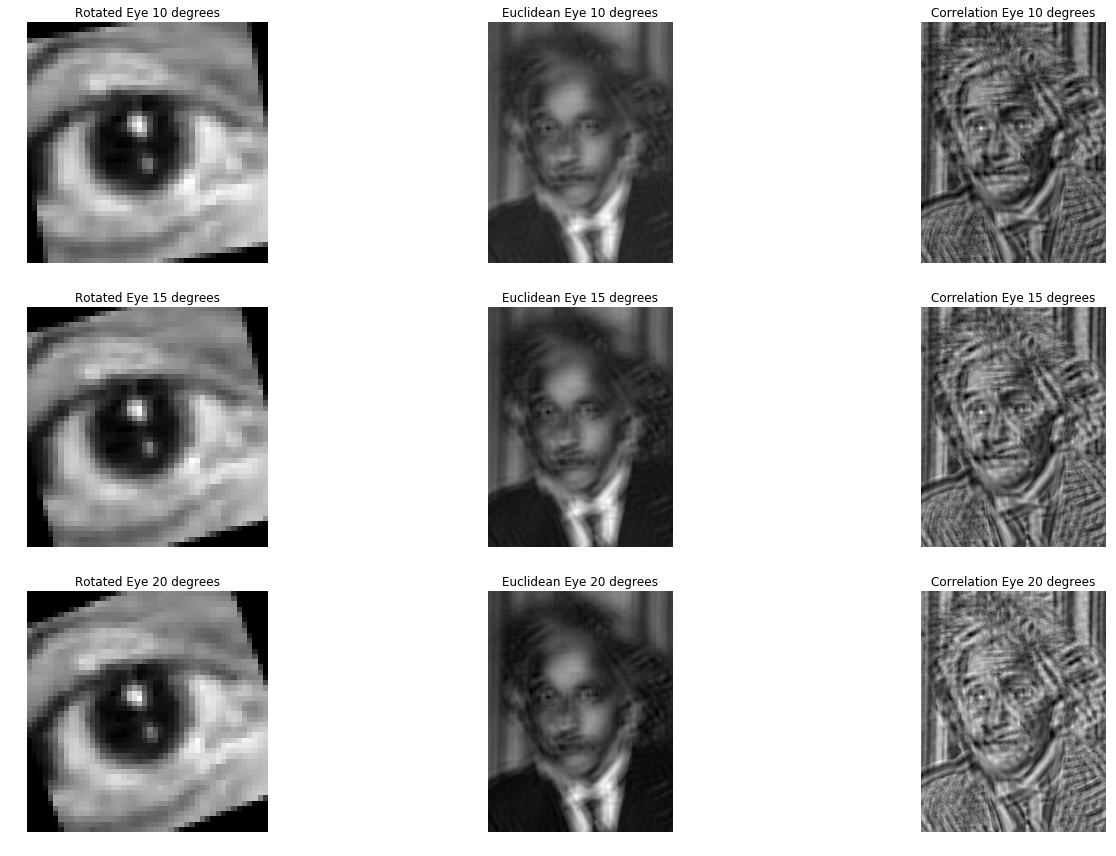

In [8]:
from skimage.transform import rotate

eye_gray = rgb2gray(eye)
einstein_gray = rgb2gray(einstein)

rotated_eye_10 = rotate(eye_gray,10)
rotated_eye_15 = rotate(eye_gray,15)
rotated_eye_20 = rotate(eye_gray,20)

euclidean_eye_10 = template_location(rotated_eye_10,einstein)
euclidean_eye_15 = template_location(rotated_eye_15,einstein)
euclidean_eye_20 = template_location(rotated_eye_20,einstein)

correlation_eye_10 = match_template(einstein_gray, rotated_eye_10)
correlation_eye_15 = match_template(einstein_gray, rotated_eye_15)
correlation_eye_20 = match_template(einstein_gray, rotated_eye_20)

fig, ( (ax1,ax2,ax3), (ax4,ax5,ax6),(ax7,ax8,ax9) ) = plt.subplots(ncols=3,nrows=3,figsize=(20,12))

ax1.imshow(rotated_eye_10,cmap='gray')
ax1.set_title('Rotated Eye 10 degrees')
ax1.axis('off')

ax2.imshow(euclidean_eye_10,cmap='gray')
ax2.set_title('Euclidean Eye 10 degrees')
ax2.axis('off')

ax3.imshow(correlation_eye_10,cmap='gray')
ax3.set_title('Correlation Eye 10 degrees')
ax3.axis('off')

ax4.imshow(rotated_eye_15,cmap='gray')
ax4.set_title('Rotated Eye 15 degrees')
ax4.axis('off')

ax5.imshow(euclidean_eye_15,cmap='gray')
ax5.set_title('Euclidean Eye 15 degrees')
ax5.axis('off')

ax6.imshow(correlation_eye_15,cmap='gray')
ax6.set_title('Correlation Eye 15 degrees')
ax6.axis('off')

ax7.imshow(rotated_eye_20,cmap='gray')
ax7.set_title('Rotated Eye 20 degrees')
ax7.axis('off')

ax8.imshow(euclidean_eye_20,cmap='gray')
ax8.set_title('Euclidean Eye 20 degrees')
ax8.axis('off')

ax9.imshow(correlation_eye_20,cmap='gray')
ax9.set_title("Correlation Eye 20 degrees")
ax9.axis('off')

plt.tight_layout()
plt.show()

1.7 Comment what is the template matching process, what advantages and disadvantages it has, how sensible is to image deformation in photometric and spatial dimensions, what parameters it has and which measure for image comparisons works better.

The template matching process use the mean template and the mean image patch to calculate the normalized 
cross-correlation. The disadvantage are that it can have a false match, and for the deformation of the images have 
less correct matches.

# 2 Histogram of Oriented Gradients


The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image 'car_template.png' and the folder 'cars', apply the HOG descriptor in order to detect where there is a car in the images in the folder 'car'. To this purpose, apply the "sliding window" technique.

2.1 Read the car template ('car_template.png') and obtain its HOG descriptor. Visualize it. [Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py) 

Hint: the HOG detector function is in the skimage.feature library. 

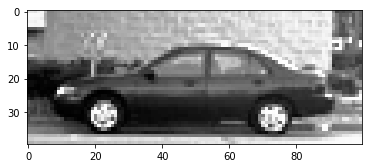

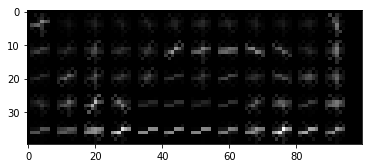

In [9]:
from skimage.feature import hog

car_template = io.imread("images/car_template.png", cmap='gray')
car_hog_vector, car_hog_image = hog(car_template, block_norm='L2-Hys', visualise=True)

plt.imshow(car_template, cmap='gray')
plt.show()
plt.imshow(car_hog_image, cmap='gray')
plt.show()

2.2 Apply the HOG descriptor on the complete set of images.

a) Read images from the folder "car", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the car template. **In order to accelerate algorithm execution, you must apply a sliding window with a step of X pixels both vertically and horizontally (e.g. X=5).**

b) Visualize the location in the image that is the most similar to the car template. What distance will you use to compare both HOG descriptors of the car template and the image region? Compare if there is any difference in their results.

Display the results of every car detection and for each distance following this format:

<img src="images_notebook/hog.png" width="800" height="100">

In [10]:
#This function does the sliding window for every image passed with it's respective hog. Its execution can be accelerated 
#with the X parameter.

cars_collection = io.ImageCollection('images/TestImages/test-*.pgm')

def sliding_window_hog(patch, patch_hog, patch_hog_descriptor, im, X):
    im_gray = rgb2gray(im)
    patch_gray = rgb2gray(patch)

    fila, colum = im_gray.shape
    p_h, p_v = patch_hog.shape
    
    dist_min = 9999
    for i in range(0, fila-p_h):
        for j in range(0,colum-p_v, X):
            im_window = im_gray[i:i+p_h, j:j+p_v]
            im_window_array = hog(im_window, block_norm='L2-Hys', visualise=False)
            
            dist_euclid = np.linalg.norm(im_window_array - patch_hog_descriptor)
            
            if dist_euclid < dist_min:
                dist_min = dist_euclid
                i_min, j_min = i, j
    return (i_min,j_min)

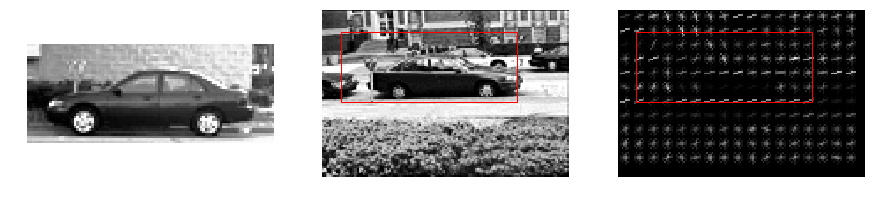

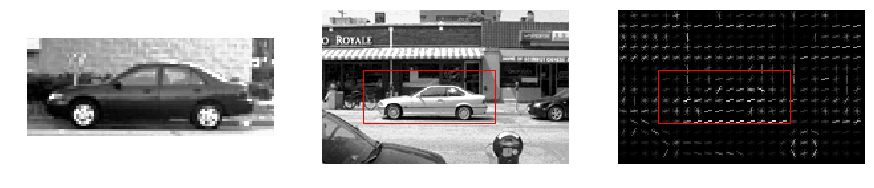

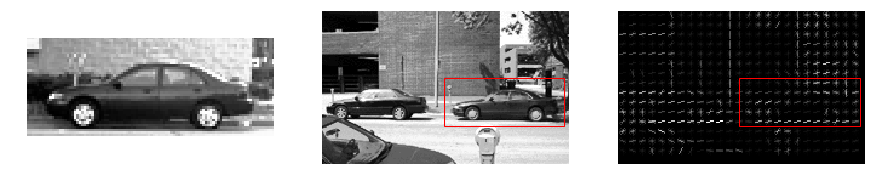

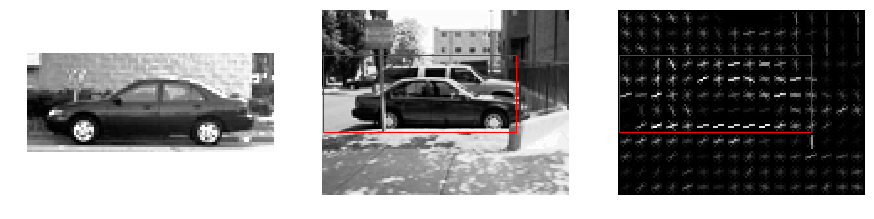

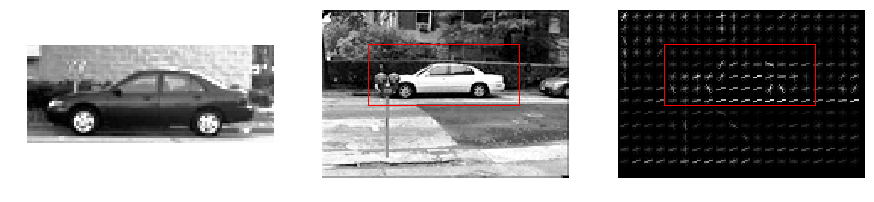

In [11]:
import matplotlib.patches as patches
from random import randint

for x in range( 120 , 125 ):
    sliding_values = sliding_window_hog(car_template, car_hog_image, car_hog_vector, cars_collection[x], 5)

    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,8))

    # Display the images
    ax1.imshow(car_template, cmap = 'gray')
    ax1.axis('off')
    ax2.imshow(cars_collection[x], cmap='gray')
    ax2.axis('off')
    
    # Create a Rectangle patch in order to add it to the image and it's hog 
    rect_car= patches.Rectangle((sliding_values[1],sliding_values[0]),100,40,linewidth=1,edgecolor='r',facecolor='none')
    rect_hog = patches.Rectangle((sliding_values[1],sliding_values[0]),100,40,linewidth=1,edgecolor='r',facecolor='none')
    
    n_car_hog_vector, n_car_hog_image = hog(cars_collection[x], block_norm='L2-Hys', visualise=True)
    
    ax3.imshow(n_car_hog_image, cmap = 'gray')
    ax3.axis('off')
    
    # Add the patch to the Axes
    ax2.add_patch(rect_car)
    ax3.add_patch(rect_hog)

    plt.show()

2.3 Count on how many images were the cars detected correctly and discuss the algorithm failures. What do you think can be the reasons for the failure?

Discuss what is the HOG descriptor, what are the parameters of the algorithm, which are the optimal values for the car detection testing several values of the parameters up to your criterion. Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

Only 5 images are detected correctly from the collection of the cars images. We think that the reason of the failure are because there are some elements between the cars in the images making the algorithm unable to detect the cars.

The HOG descriptor is a vector that helps us to identify the features of the image, this vector is a gradient magnitude of the angle that is affected by illumination changes. The parameters that we use in the function are the image that we want to know the festures, the block_norm='L2-Hys', that is a regularitzation parameter and the parameter visualise to True. To achieve invariance to changes in illumination or shadowing  we compute a measure of intensity across a larger region than a cell and normalize all the cells within the block with this intensity value.

The advanatges of the HOG-based object detector are that is not important the size, the orientacion, the colors, the lighting or anithing else, it's much more accurate that the template-based object detection.


# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

In theory classes, we saw two feature extraction methods: SIFT and ORB. Let us focus on ORB.

Analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

3.1 Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks6.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. Define the algorithm in terms of functions in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

/Users/eduard/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


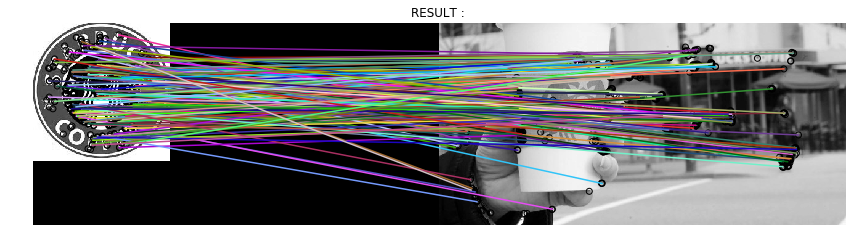

In [27]:
from skimage.feature import (match_descriptors, corner_harris,corner_peaks, ORB, plot_matches)

def ORB_matching(image1, image2, keypoints):
    image1_gray = rgb2gray(image1)#Parsing both image parameters to grayscale
    image2_gray = rgb2gray(image2)
    
    extractor_descriptor = ORB(n_keypoints = keypoints)
    
    extractor_descriptor.detect_and_extract(image1_gray)#Detecting and extracting keypoints
    keypoints1 = extractor_descriptor.keypoints #Saving keypoints into "keypoints1" vairable
    descriptors1 = extractor_descriptor.descriptors #Saving descriptors into its "descriptors" variable
    
    extractor_descriptor.detect_and_extract(image2_gray)#Same process aplied for the second image
    keypoints2 = extractor_descriptor.keypoints 
    descriptors2 = extractor_descriptor.descriptors 
    
    matches = match_descriptors(descriptors1, descriptors2, cross_check = True)#Obtaining matches
    
    fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(12,4))

    plot_matches(ax, image1_gray, image2_gray, keypoints1, keypoints2, matches)
    ax.axis('off')
    ax.set_title("RESULT : ")

    plt.tight_layout()
    plt.show()
    
    
starbucks = io.imread('./images/starbucks.jpg')
starbucks6 = io.imread('./images/starbucks6.jpg')
ORB_matching(starbucks, starbucks6, 500)    

3.2 Repeate the experiment comparing the "starbucks.jpg" image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

/Users/eduard/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


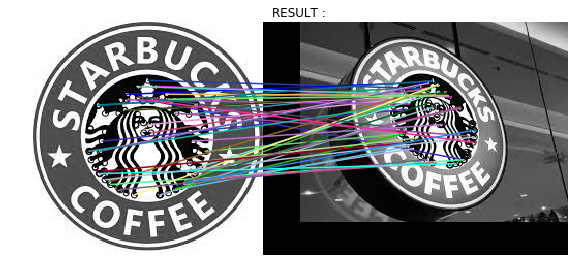

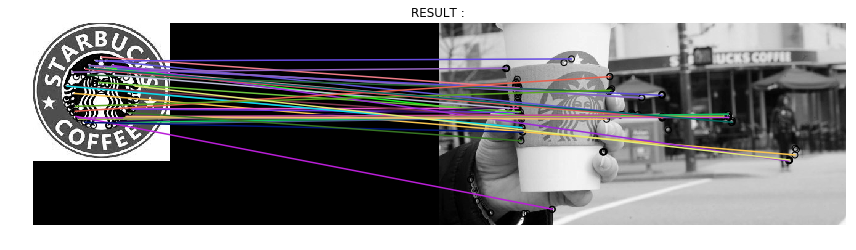

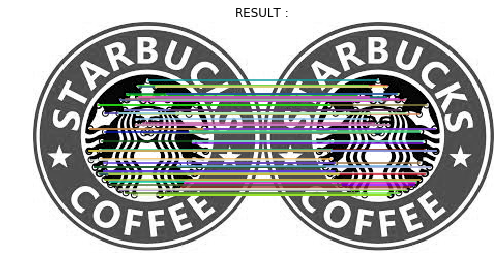

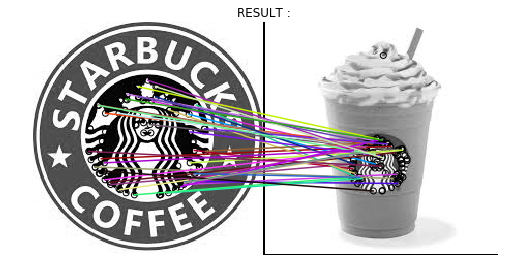

In [28]:
starbucks_col = io.ImageCollection('images/starbucks*.jpg')

for i in starbucks_col: #Iterating over starbucks collection
    ORB_matching(starbucks, i, 100)

3.3 Repeate the experiment in 3.2: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

Help: To do so, you can use the function given below as example:

import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)

or

tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)

In [37]:
def ORB_matching_2(image1, keypoints):
    image1_gray = rgb2gray(image1)#Parsing image parameter to grayscale
    
    image2_tform = tf.rotate(image1_gray, 180)#Rotating images and changing its scale
    tform = tf.AffineTransform(scale=(1.2, 1.2),translation=(0, -100))
    image3_tform = tf.warp(image1_gray, tform)
    
    extractor_descriptor = ORB(n_keypoints = keypoints)
    
    extractor_descriptor.detect_and_extract(image1_gray)#Detecting and extracting keypoints
    keypoints1 = extractor_descriptor.keypoints #Saving keypoints into "keypoints1" vairable
    descriptors1 = extractor_descriptor.descriptors #Saving descriptors into its "descriptors" variable
    
    extractor_descriptor.detect_and_extract(image2_tform)#Same process aplied for the second image
    keypoints2 = extractor_descriptor.keypoints 
    descriptors2 = extractor_descriptor.descriptors
    
    extractor_descriptor.detect_and_extract(image3_tform)#Same process aplied for the second image
    keypoints3 = extractor_descriptor.keypoints 
    descriptors3 = extractor_descriptor.descriptors
    
    matches = match_descriptors(descriptors1, descriptors2, cross_check = True)
    matches2 = match_descriptors(descriptors1, descriptors2, cross_check = True)
    
    fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(12,4))

    plot_matches(ax, image1_gray, image2_tform, keypoints1, keypoints2, matches)
    ax.axis('off')
    ax.set_title("RESULT : ")

    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(12,4))

    plot_matches(ax, image1_gray, image3_tform, keypoints1, keypoints3, matches2)
    ax.axis('off')
    ax.set_title("RESULT : ")

    plt.tight_layout()
    plt.show()

/Users/eduard/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


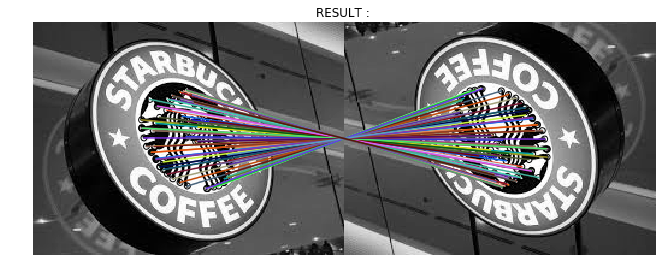

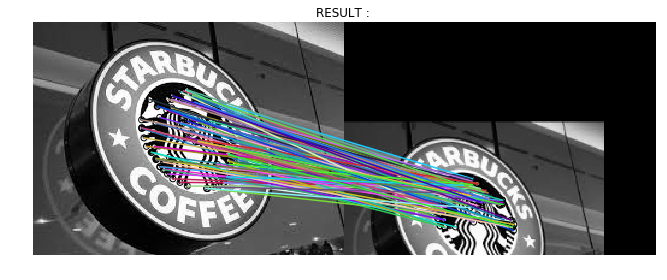

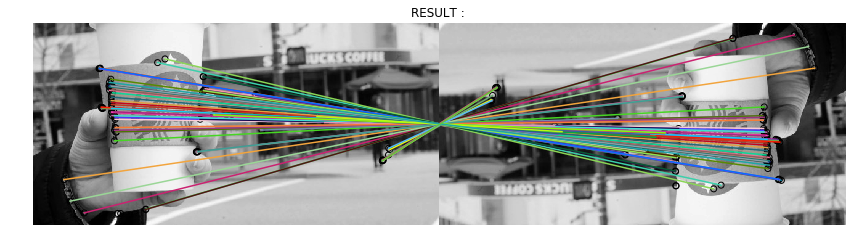

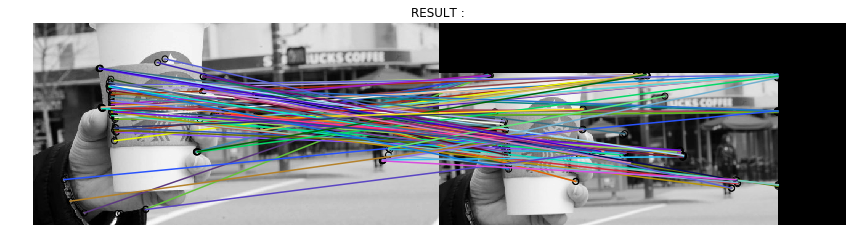

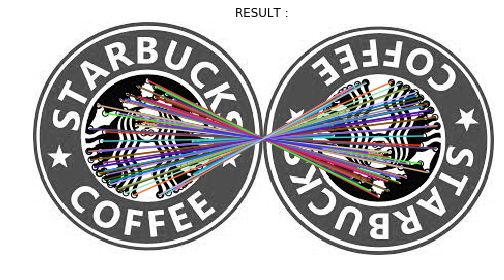

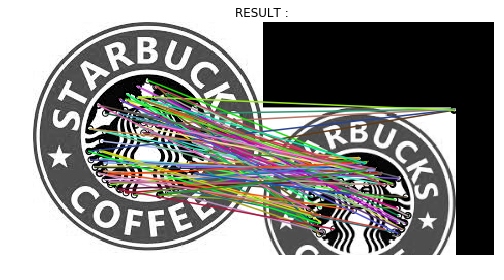

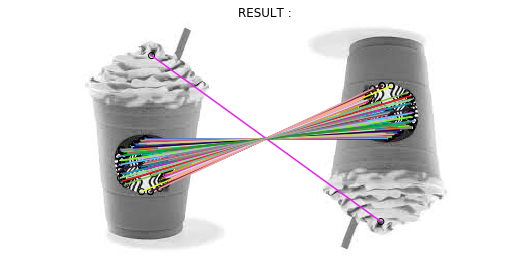

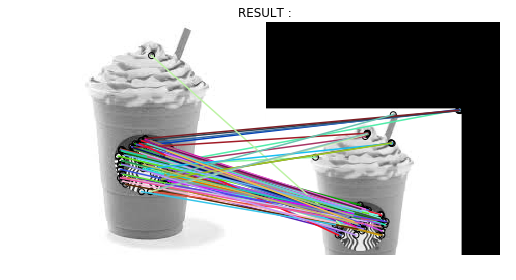

In [38]:
for i in starbucks_col:
    ORB_matching_2(i, 100)

3.4 **(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



3.5 Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

    The ORB is faster and more efficient

- What would happen if you analyse an image that does not contain the Starbucks logo? 

    The algorithm wouldn't find matches on the image.
    

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 
     
     We could use SIFT techniques
    

### Appendix

In [ ]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)